In [0]:
from pathlib import Path
import pandas as pd
import json
import re
from tqdm import tqdm
import numpy as np



In [0]:
df = pd.read_csv("xqrs_v2_cleaned.csv").drop('Unnamed: 0', axis=1)

In [49]:
df

,Set,Categorie Montage,Dossier Patient,Patient,Session,File N°,exam_duration,SWT_vs_XQRS,Pan_vs_XQRS,interval_index,interval_start_time,mean_nni,sdnn,sdsd,nni_50,pnni_50,nni_20,pnni_20,rmssd,median_nni,range_nni,cvsd,cvnni,mean_hr,max_hr,min_hr,std_hr,lf,hf,vlf,lf_hf_ratio,csi,cvi,Modified_csi,sampen,sd1,sd2,ratio_sd2_sd1,label,cle_exam,max_duration,mean_nni%,csi%,hf%
0,train,01_tcp_ar,86,8643,s002_2012_02_22,t005,300,0.977827,0.795613,0.0,0.0,665.457589,1.942364,1.532157,0.0,0.000000,0.0,0.000000,1.532157,664.06250,3.90625,0.002302,0.002919,90.164234,90.352941,89.824561,0.253177,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,train_01_tcp_ar_8643_s002_2012_02_22_t005,29.0,100.0,76.666667,46.666667
1,train,01_tcp_ar,86,8643,s002_2012_02_22,t005,300,0.977827,0.795613,1.0,10000.0,672.135417,11.762073,11.504201,0.0,0.000000,1.0,6.666667,11.718750,675.78125,46.87500,0.017435,0.017500,89.294479,94.814815,88.275862,1.582749,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,train_01_tcp_ar_8643_s002_2012_02_22_t005,29.0,100.0,76.666667,46.666667
2,train,01_tcp_ar,86,8643,s002_2012_02_22,t005,300,0.977827,0.795613,2.0,20000.0,657.031250,10.460751,9.002380,0.0,0.000000,1.0,6.666667,9.511195,660.15625,42.96875,0.014476,0.015921,91.342484,96.603774,90.352941,1.471285,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,train_01_tcp_ar_8643_s002_2012_02_22_t005,29.0,100.0,76.666667,46.666667
3,train,01_tcp_ar,86,8643,s002_2012_02_22,t005,300,0.977827,0.795613,3.0,30000.0,660.677083,2.499767,1.786586,0.0,0.000000,0.0,0.000000,1.808242,660.15625,7.81250,0.002737,0.003784,90.817138,91.428571,90.352941,0.332091,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,train_01_tcp_ar_8643_s002_2012_02_22_t005,29.0,100.0,76.666667,46.666667
4,train,01_tcp_ar,86,8643,s002_2012_02_22,t005,300,0.977827,0.795613,4.0,40000.0,663.330078,6.723404,2.240189,0.0,0.000000,0.0,0.000000,2.470529,664.06250,15.62500,0.003724,0.010136,90.461400,91.428571,89.302326,0.885948,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,train_01_tcp_ar_8643_s002_2012_02_22_t005,29.0,100.0,76.666667,46.666667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39424,train,01_tcp_ar,95,9528,s002_2014_04_01,t001,1306,0.999353,0.965049,113.0,1130000.0,827.333333,24.171107,26.879591,2.0,16.666667,4.0,33.333333,26.941013,824.00000,100.00000,0.032564,0.029216,72.576796,75.757576,67.264574,1.955104,1015.378448,157.839910,330.333761,6.432964,3.232486,4.166889,704.286592,1.174985,16.850628,54.469421,3.232486,0.0,train_01_tcp_ar_9528_s002_2014_04_01_t001,130.0,100.0,94.656489,87.786260
39425,train,01_tcp_ar,95,9528,s002_2014_04_01,t001,1306,0.999353,0.965049,114.0,1140000.0,837.333333,16.913326,20.493095,0.0,0.000000,2.0,16.666667,20.573593,838.00000,72.00000,0.024570,0.020199,71.682067,73.891626,67.873303,1.345946,660.094141,163.970956,269.736127,4.025677,3.022357,4.187621,652.122670,1.110041,17.847511,53.941557,3.022357,0.0,train_01_tcp_ar_9528_s002_2014_04_01_t001,130.0,100.0,94.656489,87.786260
39426,train,01_tcp_ar,95,9528,s002_2014_04_01,t001,1306,0.999353,0.965049,115.0,1150000.0,848.363636,38.008611,15.798734,0.0,0.000000,3.0,27.272727,19.839355,840.00000,120.00000,0.023385,0.044802,70.856520,77.720207,67.264574,3.096953,823.397039,151.634881,293.950246,5.430129,2.872921,4.124648,562.094349,1.047319,17.025581,48.913145,2.872921,0.0,train_01_tcp_ar_9528_s002_2014_04_01_t001,130.0,100.0,94.656489,87.786260
39427,train,01_tcp_ar,95,9528,s002_2014_04_01,t001,1306,0.999353,0.965049,116.0,1160000.0,874.333333,36.320125,32.731313,1.0,8.333333,4.0,33.333333,32.763616,888.00000,112.00000,0.037473,0.041540,68.738335,75.376884,66.079295,2.883375,640.438199,152.354849,242.817347,4.203596,3.062182,4.127945,620.896089,1.166932,16.553771,50.690659,3.062182,0.0,train_01_tcp_ar_9528_s002_2014_04_01_t001,130.0,100.0,94.656489,87.786260


In [0]:
df_RF = df[df['Patient'] == 8204]

In [51]:
df_RF

,Set,Categorie Montage,Dossier Patient,Patient,Session,File N°,exam_duration,SWT_vs_XQRS,Pan_vs_XQRS,interval_index,interval_start_time,mean_nni,sdnn,sdsd,nni_50,pnni_50,nni_20,pnni_20,rmssd,median_nni,range_nni,cvsd,cvnni,mean_hr,max_hr,min_hr,std_hr,lf,hf,vlf,lf_hf_ratio,csi,cvi,Modified_csi,sampen,sd1,sd2,ratio_sd2_sd1,label,cle_exam,max_duration,mean_nni%,csi%,hf%
30686,train,01_tcp_ar,82,8204,s001_2011_10_19,t000,1401,0.970911,0.936756,0.0,0.0,1254.285714,57.958935,62.723379,1.0,14.285714,2.0,28.571429,65.442086,1284.0,156.0,0.052175,0.046209,47.930917,53.191489,46.728972,2.219609,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0000,train_01_tcp_ar_8204_s001_2011_10_19_t000,140.0,94.326241,90.780142,85.815603
30687,train,01_tcp_ar,82,8204,s001_2011_10_19,t000,1401,0.970911,0.936756,1.0,10000.0,942.500000,70.978230,63.654543,4.0,33.333333,5.0,41.666667,65.909028,948.0,268.0,0.069930,0.075308,64.046201,80.213904,59.055118,5.374772,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0000,train_01_tcp_ar_8204_s001_2011_10_19_t000,140.0,94.326241,90.780142,85.815603
30688,train,01_tcp_ar,82,8204,s001_2011_10_19,t000,1401,0.970911,0.936756,2.0,20000.0,NaN,NaN,NaN,0.0,0.000000,2.0,18.181818,NaN,NaN,84.0,NaN,NaN,NaN,69.444444,63.291139,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0000,train_01_tcp_ar_8204_s001_2011_10_19_t000,140.0,94.326241,90.780142,85.815603
30689,train,01_tcp_ar,82,8204,s001_2011_10_19,t000,1401,0.970911,0.936756,3.0,30000.0,644.666667,138.175182,52.684661,2.0,13.333333,5.0,33.333333,57.316166,732.0,344.0,0.088908,0.214336,98.008346,145.631068,79.365079,23.954494,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.8008,train_01_tcp_ar_8204_s001_2011_10_19_t000,140.0,94.326241,90.780142,85.815603
30690,train,01_tcp_ar,82,8204,s001_2011_10_19,t000,1401,0.970911,0.936756,4.0,40000.0,NaN,NaN,NaN,5.0,27.777778,5.0,27.777778,NaN,NaN,354.0,NaN,NaN,NaN,191.082803,89.820359,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0000,train_01_tcp_ar_8204_s001_2011_10_19_t000,140.0,94.326241,90.780142,85.815603
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30822,train,01_tcp_ar,82,8204,s001_2011_10_19,t000,1401,0.970911,0.936756,136.0,1360000.0,1054.222222,8.743251,8.888194,0.0,0.000000,1.0,11.111111,9.380832,1056.0,32.0,0.008898,0.008294,56.917532,58.139535,56.390977,0.452112,145.381679,11.494885,56.801857,12.647510,3.229794,3.445743,306.643434,1.845827,7.348927,23.735524,3.229794,0.0000,train_01_tcp_ar_8204_s001_2011_10_19_t000,140.0,94.326241,90.780142,85.815603
30823,train,01_tcp_ar,82,8204,s001_2011_10_19,t000,1401,0.970911,0.936756,137.0,1370000.0,1066.800000,11.003030,14.966630,0.0,0.000000,0.0,0.000000,15.025904,1068.0,32.0,0.014085,0.010314,56.248363,57.251908,55.555556,0.551225,163.214474,15.274893,46.712723,10.685147,3.204912,3.479403,315.083570,inf,7.668906,24.578173,3.204912,0.0000,train_01_tcp_ar_8204_s001_2011_10_19_t000,140.0,94.326241,90.780142,85.815603
30824,train,01_tcp_ar,82,8204,s001_2011_10_19,t000,1401,0.970911,0.936756,138.0,1380000.0,1073.777778,7.774603,6.633250,0.0,0.000000,0.0,0.000000,6.928203,1072.0,24.0,0.006452,0.007240,55.880111,56.818182,55.555556,0.384960,150.014638,13.423916,54.482456,11.175177,2.681554,3.437662,229.832141,1.945910,7.990567,21.427139,2.681554,0.0000,train_01_tcp_ar_8204_s001_2011_10_19_t000,140.0,94.326241,90.780142,85.815603
30825,train,01_tcp_ar,82,8204,s001_2011_10_19,t000,1401,0.970911,0.936756,139.0,1390000.0,1079.111111,7.688375,9.380832,0.0,0.000000,0.0,0.000000,9.380832,1076.0,20.0,0.008693,0.007125,55.603810,55.970149,54.945055,0.371013,67.685677,16.193480,75.098294,4.179810,3.398452,3.409120,317.308582,1.458615,6.868461,23.342138,3.398452,0.0000,train_01_tcp_ar_8204_s001_2011_10_19_t000,140.0,94.326241,90.780142,85.815603


In [0]:
df_RF = df_RF.drop(['Set','Categorie Montage','Dossier Patient','File N°','exam_duration','Pan_vs_XQRS','SWT_vs_XQRS'],axis=1)

In [53]:
df_RF


,Patient,Session,interval_index,interval_start_time,mean_nni,sdnn,sdsd,nni_50,pnni_50,nni_20,pnni_20,rmssd,median_nni,range_nni,cvsd,cvnni,mean_hr,max_hr,min_hr,std_hr,lf,hf,vlf,lf_hf_ratio,csi,cvi,Modified_csi,sampen,sd1,sd2,ratio_sd2_sd1,label,cle_exam,max_duration,mean_nni%,csi%,hf%
30686,8204,s001_2011_10_19,0.0,0.0,1254.285714,57.958935,62.723379,1.0,14.285714,2.0,28.571429,65.442086,1284.0,156.0,0.052175,0.046209,47.930917,53.191489,46.728972,2.219609,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0000,train_01_tcp_ar_8204_s001_2011_10_19_t000,140.0,94.326241,90.780142,85.815603
30687,8204,s001_2011_10_19,1.0,10000.0,942.500000,70.978230,63.654543,4.0,33.333333,5.0,41.666667,65.909028,948.0,268.0,0.069930,0.075308,64.046201,80.213904,59.055118,5.374772,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0000,train_01_tcp_ar_8204_s001_2011_10_19_t000,140.0,94.326241,90.780142,85.815603
30688,8204,s001_2011_10_19,2.0,20000.0,NaN,NaN,NaN,0.0,0.000000,2.0,18.181818,NaN,NaN,84.0,NaN,NaN,NaN,69.444444,63.291139,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0000,train_01_tcp_ar_8204_s001_2011_10_19_t000,140.0,94.326241,90.780142,85.815603
30689,8204,s001_2011_10_19,3.0,30000.0,644.666667,138.175182,52.684661,2.0,13.333333,5.0,33.333333,57.316166,732.0,344.0,0.088908,0.214336,98.008346,145.631068,79.365079,23.954494,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.8008,train_01_tcp_ar_8204_s001_2011_10_19_t000,140.0,94.326241,90.780142,85.815603
30690,8204,s001_2011_10_19,4.0,40000.0,NaN,NaN,NaN,5.0,27.777778,5.0,27.777778,NaN,NaN,354.0,NaN,NaN,NaN,191.082803,89.820359,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0000,train_01_tcp_ar_8204_s001_2011_10_19_t000,140.0,94.326241,90.780142,85.815603
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30822,8204,s001_2011_10_19,136.0,1360000.0,1054.222222,8.743251,8.888194,0.0,0.000000,1.0,11.111111,9.380832,1056.0,32.0,0.008898,0.008294,56.917532,58.139535,56.390977,0.452112,145.381679,11.494885,56.801857,12.647510,3.229794,3.445743,306.643434,1.845827,7.348927,23.735524,3.229794,0.0000,train_01_tcp_ar_8204_s001_2011_10_19_t000,140.0,94.326241,90.780142,85.815603
30823,8204,s001_2011_10_19,137.0,1370000.0,1066.800000,11.003030,14.966630,0.0,0.000000,0.0,0.000000,15.025904,1068.0,32.0,0.014085,0.010314,56.248363,57.251908,55.555556,0.551225,163.214474,15.274893,46.712723,10.685147,3.204912,3.479403,315.083570,inf,7.668906,24.578173,3.204912,0.0000,train_01_tcp_ar_8204_s001_2011_10_19_t000,140.0,94.326241,90.780142,85.815603
30824,8204,s001_2011_10_19,138.0,1380000.0,1073.777778,7.774603,6.633250,0.0,0.000000,0.0,0.000000,6.928203,1072.0,24.0,0.006452,0.007240,55.880111,56.818182,55.555556,0.384960,150.014638,13.423916,54.482456,11.175177,2.681554,3.437662,229.832141,1.945910,7.990567,21.427139,2.681554,0.0000,train_01_tcp_ar_8204_s001_2011_10_19_t000,140.0,94.326241,90.780142,85.815603
30825,8204,s001_2011_10_19,139.0,1390000.0,1079.111111,7.688375,9.380832,0.0,0.000000,0.0,0.000000,9.380832,1076.0,20.0,0.008693,0.007125,55.603810,55.970149,54.945055,0.371013,67.685677,16.193480,75.098294,4.179810,3.398452,3.409120,317.308582,1.458615,6.868461,23.342138,3.398452,0.0000,train_01_tcp_ar_8204_s001_2011_10_19_t000,140.0,94.326241,90.780142,85.815603


In [0]:
df_RF = df_RF.drop(['Session','max_duration','mean_nni%','csi%','hf%'],axis=1)

In [55]:
df_RF

,Patient,interval_index,interval_start_time,mean_nni,sdnn,sdsd,nni_50,pnni_50,nni_20,pnni_20,rmssd,median_nni,range_nni,cvsd,cvnni,mean_hr,max_hr,min_hr,std_hr,lf,hf,vlf,lf_hf_ratio,csi,cvi,Modified_csi,sampen,sd1,sd2,ratio_sd2_sd1,label,cle_exam
30686,8204,0.0,0.0,1254.285714,57.958935,62.723379,1.0,14.285714,2.0,28.571429,65.442086,1284.0,156.0,0.052175,0.046209,47.930917,53.191489,46.728972,2.219609,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0000,train_01_tcp_ar_8204_s001_2011_10_19_t000
30687,8204,1.0,10000.0,942.500000,70.978230,63.654543,4.0,33.333333,5.0,41.666667,65.909028,948.0,268.0,0.069930,0.075308,64.046201,80.213904,59.055118,5.374772,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0000,train_01_tcp_ar_8204_s001_2011_10_19_t000
30688,8204,2.0,20000.0,NaN,NaN,NaN,0.0,0.000000,2.0,18.181818,NaN,NaN,84.0,NaN,NaN,NaN,69.444444,63.291139,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0000,train_01_tcp_ar_8204_s001_2011_10_19_t000
30689,8204,3.0,30000.0,644.666667,138.175182,52.684661,2.0,13.333333,5.0,33.333333,57.316166,732.0,344.0,0.088908,0.214336,98.008346,145.631068,79.365079,23.954494,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.8008,train_01_tcp_ar_8204_s001_2011_10_19_t000
30690,8204,4.0,40000.0,NaN,NaN,NaN,5.0,27.777778,5.0,27.777778,NaN,NaN,354.0,NaN,NaN,NaN,191.082803,89.820359,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0000,train_01_tcp_ar_8204_s001_2011_10_19_t000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30822,8204,136.0,1360000.0,1054.222222,8.743251,8.888194,0.0,0.000000,1.0,11.111111,9.380832,1056.0,32.0,0.008898,0.008294,56.917532,58.139535,56.390977,0.452112,145.381679,11.494885,56.801857,12.647510,3.229794,3.445743,306.643434,1.845827,7.348927,23.735524,3.229794,0.0000,train_01_tcp_ar_8204_s001_2011_10_19_t000
30823,8204,137.0,1370000.0,1066.800000,11.003030,14.966630,0.0,0.000000,0.0,0.000000,15.025904,1068.0,32.0,0.014085,0.010314,56.248363,57.251908,55.555556,0.551225,163.214474,15.274893,46.712723,10.685147,3.204912,3.479403,315.083570,inf,7.668906,24.578173,3.204912,0.0000,train_01_tcp_ar_8204_s001_2011_10_19_t000
30824,8204,138.0,1380000.0,1073.777778,7.774603,6.633250,0.0,0.000000,0.0,0.000000,6.928203,1072.0,24.0,0.006452,0.007240,55.880111,56.818182,55.555556,0.384960,150.014638,13.423916,54.482456,11.175177,2.681554,3.437662,229.832141,1.945910,7.990567,21.427139,2.681554,0.0000,train_01_tcp_ar_8204_s001_2011_10_19_t000
30825,8204,139.0,1390000.0,1079.111111,7.688375,9.380832,0.0,0.000000,0.0,0.000000,9.380832,1076.0,20.0,0.008693,0.007125,55.603810,55.970149,54.945055,0.371013,67.685677,16.193480,75.098294,4.179810,3.398452,3.409120,317.308582,1.458615,6.868461,23.342138,3.398452,0.0000,train_01_tcp_ar_8204_s001_2011_10_19_t000


In [0]:
df_RF = df_RF.replace([np.inf, -np.inf], np.nan)

In [0]:
df_RF = df_RF.groupby(df_RF['cle_exam']).transform(lambda x: x.fillna(x.mean()))

In [58]:
df_RF

,Patient,interval_index,interval_start_time,mean_nni,sdnn,sdsd,nni_50,pnni_50,nni_20,pnni_20,rmssd,median_nni,range_nni,cvsd,cvnni,mean_hr,max_hr,min_hr,std_hr,lf,hf,vlf,lf_hf_ratio,csi,cvi,Modified_csi,sampen,sd1,sd2,ratio_sd2_sd1,label
30686,8204,0.0,0.0,1254.285714,57.958935,62.723379,1.000000,14.285714,2.000000,28.571429,65.442086,1284.000000,156.000000,0.052175,0.046209,47.930917,53.191489,46.728972,2.219609,705.557457,112.902086,855.581648,14.529002,7.053630,3.903056,2428.753768,0.674238,10.764379,73.576308,7.053630,0.000000
30687,8204,1.0,10000.0,942.500000,70.978230,63.654543,4.000000,33.333333,5.000000,41.666667,65.909028,948.000000,268.000000,0.069930,0.075308,64.046201,80.213904,59.055118,5.374772,705.557457,112.902086,855.581648,14.529002,7.053630,3.903056,2428.753768,0.674238,10.764379,73.576308,7.053630,0.000000
30688,8204,2.0,20000.0,922.809915,20.143425,12.109557,0.000000,0.000000,2.000000,18.181818,13.029125,925.834586,84.000000,0.014806,0.023580,66.268575,69.444444,63.291139,1.765619,705.557457,112.902086,855.581648,14.529002,7.053630,3.903056,2428.753768,0.674238,10.764379,73.576308,7.053630,0.000000
30689,8204,3.0,30000.0,644.666667,138.175182,52.684661,2.000000,13.333333,5.000000,33.333333,57.316166,732.000000,344.000000,0.088908,0.214336,98.008346,145.631068,79.365079,23.954494,705.557457,112.902086,855.581648,14.529002,7.053630,3.903056,2428.753768,0.674238,10.764379,73.576308,7.053630,0.800800
30690,8204,4.0,40000.0,922.809915,20.143425,12.109557,5.000000,27.777778,5.000000,27.777778,13.029125,925.834586,354.000000,0.014806,0.023580,66.268575,191.082803,89.820359,1.765619,705.557457,112.902086,855.581648,14.529002,7.053630,3.903056,2428.753768,0.674238,10.764379,73.576308,7.053630,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30822,8204,136.0,1360000.0,1054.222222,8.743251,8.888194,0.000000,0.000000,1.000000,11.111111,9.380832,1056.000000,32.000000,0.008898,0.008294,56.917532,58.139535,56.390977,0.452112,145.381679,11.494885,56.801857,12.647510,3.229794,3.445743,306.643434,1.845827,7.348927,23.735524,3.229794,0.000000
30823,8204,137.0,1370000.0,1066.800000,11.003030,14.966630,0.000000,0.000000,0.000000,0.000000,15.025904,1068.000000,32.000000,0.014085,0.010314,56.248363,57.251908,55.555556,0.551225,163.214474,15.274893,46.712723,10.685147,3.204912,3.479403,315.083570,0.674238,7.668906,24.578173,3.204912,0.000000
30824,8204,138.0,1380000.0,1073.777778,7.774603,6.633250,0.000000,0.000000,0.000000,0.000000,6.928203,1072.000000,24.000000,0.006452,0.007240,55.880111,56.818182,55.555556,0.384960,150.014638,13.423916,54.482456,11.175177,2.681554,3.437662,229.832141,1.945910,7.990567,21.427139,2.681554,0.000000
30825,8204,139.0,1390000.0,1079.111111,7.688375,9.380832,0.000000,0.000000,0.000000,0.000000,9.380832,1076.000000,20.000000,0.008693,0.007125,55.603810,55.970149,54.945055,0.371013,67.685677,16.193480,75.098294,4.179810,3.398452,3.409120,317.308582,1.458615,6.868461,23.342138,3.398452,0.000000


In [0]:
df_RF['label'] = df_RF['label'].apply(lambda x: "1" if (x!=0) else  "0" )


In [60]:
df_RF['label']

30686    0
30687    0
30688    0
30689    1
30690    1
        ..
30822    0
30823    0
30824    0
30825    0
30826    1
Name: label, Length: 141, dtype: object

In [0]:
a = pd.Series(df_RF['label'])

In [62]:
a.value_counts()

0    131
1     10
Name: label, dtype: int64

In [63]:
df_RF

,Patient,interval_index,interval_start_time,mean_nni,sdnn,sdsd,nni_50,pnni_50,nni_20,pnni_20,rmssd,median_nni,range_nni,cvsd,cvnni,mean_hr,max_hr,min_hr,std_hr,lf,hf,vlf,lf_hf_ratio,csi,cvi,Modified_csi,sampen,sd1,sd2,ratio_sd2_sd1,label
30686,8204,0.0,0.0,1254.285714,57.958935,62.723379,1.000000,14.285714,2.000000,28.571429,65.442086,1284.000000,156.000000,0.052175,0.046209,47.930917,53.191489,46.728972,2.219609,705.557457,112.902086,855.581648,14.529002,7.053630,3.903056,2428.753768,0.674238,10.764379,73.576308,7.053630,0
30687,8204,1.0,10000.0,942.500000,70.978230,63.654543,4.000000,33.333333,5.000000,41.666667,65.909028,948.000000,268.000000,0.069930,0.075308,64.046201,80.213904,59.055118,5.374772,705.557457,112.902086,855.581648,14.529002,7.053630,3.903056,2428.753768,0.674238,10.764379,73.576308,7.053630,0
30688,8204,2.0,20000.0,922.809915,20.143425,12.109557,0.000000,0.000000,2.000000,18.181818,13.029125,925.834586,84.000000,0.014806,0.023580,66.268575,69.444444,63.291139,1.765619,705.557457,112.902086,855.581648,14.529002,7.053630,3.903056,2428.753768,0.674238,10.764379,73.576308,7.053630,0
30689,8204,3.0,30000.0,644.666667,138.175182,52.684661,2.000000,13.333333,5.000000,33.333333,57.316166,732.000000,344.000000,0.088908,0.214336,98.008346,145.631068,79.365079,23.954494,705.557457,112.902086,855.581648,14.529002,7.053630,3.903056,2428.753768,0.674238,10.764379,73.576308,7.053630,1
30690,8204,4.0,40000.0,922.809915,20.143425,12.109557,5.000000,27.777778,5.000000,27.777778,13.029125,925.834586,354.000000,0.014806,0.023580,66.268575,191.082803,89.820359,1.765619,705.557457,112.902086,855.581648,14.529002,7.053630,3.903056,2428.753768,0.674238,10.764379,73.576308,7.053630,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30822,8204,136.0,1360000.0,1054.222222,8.743251,8.888194,0.000000,0.000000,1.000000,11.111111,9.380832,1056.000000,32.000000,0.008898,0.008294,56.917532,58.139535,56.390977,0.452112,145.381679,11.494885,56.801857,12.647510,3.229794,3.445743,306.643434,1.845827,7.348927,23.735524,3.229794,0
30823,8204,137.0,1370000.0,1066.800000,11.003030,14.966630,0.000000,0.000000,0.000000,0.000000,15.025904,1068.000000,32.000000,0.014085,0.010314,56.248363,57.251908,55.555556,0.551225,163.214474,15.274893,46.712723,10.685147,3.204912,3.479403,315.083570,0.674238,7.668906,24.578173,3.204912,0
30824,8204,138.0,1380000.0,1073.777778,7.774603,6.633250,0.000000,0.000000,0.000000,0.000000,6.928203,1072.000000,24.000000,0.006452,0.007240,55.880111,56.818182,55.555556,0.384960,150.014638,13.423916,54.482456,11.175177,2.681554,3.437662,229.832141,1.945910,7.990567,21.427139,2.681554,0
30825,8204,139.0,1390000.0,1079.111111,7.688375,9.380832,0.000000,0.000000,0.000000,0.000000,9.380832,1076.000000,20.000000,0.008693,0.007125,55.603810,55.970149,54.945055,0.371013,67.685677,16.193480,75.098294,4.179810,3.398452,3.409120,317.308582,1.458615,6.868461,23.342138,3.398452,0


In [0]:
from sklearn.model_selection import train_test_split

In [0]:
X = df_RF.iloc[:, :-1]
y = df_RF.iloc[:, -1]

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,stratify=y)

In [67]:
np.any(np.isfinite(X_train))

True

In [0]:
from sklearn.preprocessing import StandardScaler

numeric_transformer = StandardScaler()

X_train = numeric_transformer.fit_transform(X_train)

In [69]:
X_train

array([[ 0.        , -0.895882  , -0.895882  , ..., -0.32908693,
        -0.43804283, -0.26378788],
       [ 0.        ,  1.0913294 ,  1.0913294 , ..., -0.69402988,
        -0.86264291, -0.5892551 ],
       [ 0.        ,  1.06738709,  1.06738709, ..., -0.5977464 ,
        -0.21381362,  1.00819193],
       ...,
       [ 0.        ,  1.47440629,  1.47440629, ..., -0.7470302 ,
        -1.05179124, -1.10424231],
       [ 0.        , -1.44655504, -1.44655504, ...,  1.42509538,
         1.62052938,  0.12850269],
       [ 0.        ,  0.03786793,  0.03786793, ..., -0.02047952,
        -0.13964111, -0.22167942]])

In [70]:
from sklearn.ensemble import RandomForestClassifier
rf_classifier = RandomForestClassifier(n_estimators=50)
rf_classifier.fit(X_train, y_train)
rf_classifier.score(X_train, y_train)

1.0

In [71]:
from sklearn.model_selection import GridSearchCV
rf_classifier_grid = RandomForestClassifier()
params = {"n_estimators": range(20, 50)}

classifier = GridSearchCV(cv=10, estimator = rf_classifier_grid, param_grid = params).fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 7 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)


In [72]:
classifier.best_params_

{'n_estimators': 34}

In [0]:
X_test = numeric_transformer.fit_transform(X_test)

In [74]:
classifier.best_estimator_.score(X_test, y_test)

0.9534883720930233

In [0]:
y_pred = classifier.predict(X_test)

In [76]:
print(y_pred)

['0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '1' '0' '0' '0' '0'
 '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0'
 '0' '0' '0' '0' '0' '0' '0']


In [77]:
print(y_test)

30726    0
30708    0
30823    0
30786    0
30784    0
30697    0
30800    0
30715    0
30732    0
30768    0
30772    1
30717    0
30720    0
30773    1
30753    0
30809    0
30824    0
30751    0
30744    0
30716    0
30774    0
30814    0
30781    0
30813    0
30763    0
30714    0
30699    0
30748    0
30694    0
30795    0
30706    0
30783    0
30791    0
30740    0
30821    0
30742    0
30721    0
30769    0
30723    1
30703    0
30752    0
30739    0
30764    0
Name: label, dtype: object


In [0]:
df_pred = pd.DataFrame(y_pred,columns=["Pred"])


In [79]:
df_pred

,Pred
0,0
1,0
2,0
3,0
4,0
5,0
6,0
7,0
8,0
9,0


In [0]:
df_test = pd.DataFrame(np.array(y_test),columns=["test"])

In [81]:
df_test

,test
0,0
1,0
2,0
3,0
4,0
5,0
6,0
7,0
8,0
9,0


In [83]:
from sklearn.metrics import f1_score
f1_score(y_test, y_pred,average='binary',pos_label='1')

0.5

In [0]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

In [86]:
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


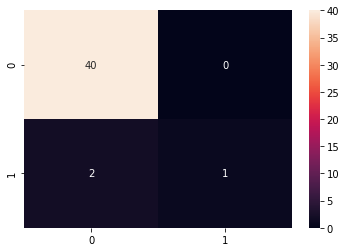

In [87]:
sns.heatmap(cm, annot=True, fmt="d")

In [88]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred, labels=[0,1]))

              precision    recall  f1-score   support

           0       0.95      1.00      0.98        40
           1       1.00      0.33      0.50         3

   micro avg       0.95      0.95      0.95        43
   macro avg       0.98      0.67      0.74        43
weighted avg       0.96      0.95      0.94        43



/usr/local/lib/python3.6/dist-packages/numpy/lib/arraysetops.py:565: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask &= (ar1 != a)


In [0]:
df_age_gender_by_patient = pd.read_csv("age_gender_by_patient.csv")

In [0]:
df_work_8204 = df_age_gender_by_patient[df_age_gender_by_patient['Patient']==8204]

In [91]:
df_work_8204

,Patient,Age,path,Genre
472,8204,60.0,/home/zozi/Downloads/info-patients-v0_4/edf/tr...,woman


In [0]:
df_frequency = pd.read_csv("finalxqrsMSTD.csv")

In [0]:
df_frequency_8204 = df_frequency[df_frequency['Patient']==8204]

In [95]:
df_frequency_8204

,Patient,"('mean_nni', 'mean')","('mean_nni', 'std')","('sdnn', 'mean')","('sdnn', 'std')","('sdsd', 'mean')","('sdsd', 'std')","('nni_50', 'mean')","('nni_50', 'std')","('pnni_50', 'mean')","('pnni_50', 'std')","('nni_20', 'mean')","('nni_20', 'std')","('pnni_20', 'mean')","('pnni_20', 'std')","('rmssd', 'mean')","('rmssd', 'std')","('median_nni', 'mean')","('median_nni', 'std')","('range_nni', 'mean')","('range_nni', 'std')","('cvsd', 'mean')","('cvsd', 'std')","('cvnni', 'mean')","('cvnni', 'std')","('mean_hr', 'mean')","('mean_hr', 'std')","('max_hr', 'mean')","('max_hr', 'std')","('min_hr', 'mean')","('min_hr', 'std')","('std_hr', 'mean')","('std_hr', 'std')","('lf', 'mean')","('lf', 'std')","('hf', 'mean')","('hf', 'std')","('vlf', 'mean')","('vlf', 'std')","('lf_hf_ratio', 'mean')","('lf_hf_ratio', 'std')","('csi', 'mean')","('csi', 'std')","('cvi', 'mean')","('cvi', 'std')","('Modified_csi', 'mean')","('Modified_csi', 'std')","('sampen', 'mean')","('sampen', 'std')","('sd1', 'mean')","('sd1', 'std')","('sd2', 'mean')","('sd2', 'std')","('ratio_sd2_sd1', 'mean')","('ratio_sd2_sd1', 'std')",crisis_frequency
373,8204,922.809915,157.915892,20.143425,19.419476,12.109557,10.876027,0.292857,0.852389,2.306792,6.314341,0.985714,1.38328,8.3044,11.133099,13.029125,11.42011,925.834586,157.056262,67.964286,78.065312,0.014806,0.014196,0.02358,0.026942,inf,NaN,inf,NaN,inf,NaN,1.765619,2.989415,705.557457,1027.664496,112.902086,211.560242,855.581648,738.80173,14.529002,9.228041,7.05363,3.603245,3.903056,0.537804,2428.753768,2484.015694,inf,NaN,10.764379,8.355289,73.576308,55.87493,7.05363,3.603245,0.070922
